In [1]:
import time
import random
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import confusion_matrix

from keras.optimizers import Adam
from keras.callbacks import ReduceLROnPlateau,EarlyStopping, LambdaCallback, ModelCheckpoint, CSVLogger
from keras.models import load_model

from ipynb.fs.full import DataLoader
from ipynb.fs.full import Models

import seaborn as sns

import importlib
importlib.reload(DataLoader)
importlib.reload(Models)

<module 'ipynb.fs.full.Models' (C:\Users\ocean\Documents\Projects\Zoidberg\Models.ipynb)>

### Parameters

In [2]:
samplesTrain = random.randint(2500, 3000) #max : 5219 par ex 50 en normal et 50 en pneumonia à voir si intervalle random c'est mieux 
samplesVal = 19 #max : 19
samplesTest = random.randint(400, 625) #max : 625

batch_size=64
percent=0.6
learning_rate=0.001
epochs = 10

random_state= 1
max_iter=1000

In [3]:
data_loader = DataLoader.DataLoader(samplesTrain,
                         samplesVal,
                         samplesTest,
                         batch_size=batch_size,
                         augment_data=True,
                         shuffle=True)

############################################################################################
input\train/NORMAL
Processed image 1/1342
Processed image 2/1342
Processed image 3/1342
Processed image 4/1342
Processed image 5/1342
Processed image 6/1342
Processed image 7/1342
Processed image 8/1342
Processed image 9/1342
Processed image 10/1342
Processed image 11/1342
Processed image 12/1342
Processed image 13/1342
Processed image 14/1342
Processed image 15/1342
Processed image 16/1342
Processed image 17/1342
Processed image 18/1342
Processed image 19/1342
Processed image 20/1342
Processed image 21/1342
Processed image 22/1342
Processed image 23/1342
Processed image 24/1342
Processed image 25/1342
Processed image 26/1342
Processed image 27/1342
Processed image 28/1342
Processed image 29/1342
Processed image 30/1342
Processed image 31/1342
Processed image 32/1342
Processed image 33/1342
Processed image 34/1342
Processed image 35/1342
Processed image 36/1342
Processed image 37/1342
Processed

Processed image 329/1342
Processed image 330/1342
Processed image 331/1342
Processed image 332/1342
Processed image 333/1342
Processed image 334/1342
Processed image 335/1342
Processed image 336/1342
Processed image 337/1342
Processed image 338/1342
Processed image 339/1342
Processed image 340/1342
Processed image 341/1342
Processed image 342/1342
Processed image 343/1342
Processed image 344/1342
Processed image 345/1342
Processed image 346/1342
Processed image 347/1342
Processed image 348/1342
Processed image 349/1342
Processed image 350/1342
Processed image 351/1342
Processed image 352/1342
Processed image 353/1342
Processed image 354/1342
Processed image 355/1342
Processed image 356/1342
Processed image 357/1342
Processed image 358/1342
Processed image 359/1342
Processed image 360/1342
Processed image 361/1342
Processed image 362/1342
Processed image 363/1342
Processed image 364/1342
Processed image 365/1342
Processed image 366/1342
Processed image 367/1342
Processed image 368/1342


Processed image 657/1342
Processed image 658/1342
Processed image 659/1342
Processed image 660/1342
Processed image 661/1342
Processed image 662/1342
Processed image 663/1342
Processed image 664/1342
Processed image 665/1342
Processed image 666/1342
Processed image 667/1342
Processed image 668/1342
Processed image 669/1342
Processed image 670/1342
Processed image 671/1342
Processed image 672/1342
Processed image 673/1342
Processed image 674/1342
Processed image 675/1342
Processed image 676/1342
Processed image 677/1342
Processed image 678/1342
Processed image 679/1342
Processed image 680/1342
Processed image 681/1342
Processed image 682/1342
Processed image 683/1342
Processed image 684/1342
Processed image 685/1342
Processed image 686/1342
Processed image 687/1342
Processed image 688/1342
Processed image 689/1342
Processed image 690/1342
Processed image 691/1342
Processed image 692/1342
Processed image 693/1342
Processed image 694/1342
Processed image 695/1342
Processed image 696/1342


Processed image 985/1342
Processed image 986/1342
Processed image 987/1342
Processed image 988/1342
Processed image 989/1342
Processed image 990/1342
Processed image 991/1342
Processed image 992/1342
Processed image 993/1342
Processed image 994/1342
Processed image 995/1342
Processed image 996/1342
Processed image 997/1342
Processed image 998/1342
Processed image 999/1342
Processed image 1000/1342
Processed image 1001/1342
Processed image 1002/1342
Processed image 1003/1342
Processed image 1004/1342
Processed image 1005/1342
Processed image 1006/1342
Processed image 1007/1342
Processed image 1008/1342
Processed image 1009/1342
Processed image 1010/1342
Processed image 1011/1342
Processed image 1012/1342
Processed image 1013/1342
Processed image 1014/1342
Processed image 1015/1342
Processed image 1016/1342
Processed image 1017/1342
Processed image 1018/1342
Processed image 1019/1342
Processed image 1020/1342
Processed image 1021/1342
Processed image 1022/1342
Processed image 1023/1342
P

Processed image 1301/1342
Processed image 1302/1342
Processed image 1303/1342
Processed image 1304/1342
Processed image 1305/1342
Processed image 1306/1342
Processed image 1307/1342
Processed image 1308/1342
Processed image 1309/1342
Processed image 1310/1342
Processed image 1311/1342
Processed image 1312/1342
Processed image 1313/1342
Processed image 1314/1342
Processed image 1315/1342
Processed image 1316/1342
Processed image 1317/1342
Processed image 1318/1342
Processed image 1319/1342
Processed image 1320/1342
Processed image 1321/1342
Processed image 1322/1342
Processed image 1323/1342
Processed image 1324/1342
Processed image 1325/1342
Processed image 1326/1342
Processed image 1327/1342
Processed image 1328/1342
Processed image 1329/1342
Processed image 1330/1342
Processed image 1331/1342
Processed image 1332/1342
Processed image 1333/1342
Processed image 1334/1342
Processed image 1335/1342
Processed image 1336/1342
Processed image 1337/1342
Processed image 1338/1342
Processed im

Processed image 286/2817
Processed image 287/2817
Processed image 288/2817
Processed image 289/2817
Processed image 290/2817
Processed image 291/2817
Processed image 292/2817
Processed image 293/2817
Processed image 294/2817
Processed image 295/2817
Processed image 296/2817
Processed image 297/2817
Processed image 298/2817
Processed image 299/2817
Processed image 300/2817
Processed image 301/2817
Processed image 302/2817
Processed image 303/2817
Processed image 304/2817
Processed image 305/2817
Processed image 306/2817
Processed image 307/2817
Processed image 308/2817
Processed image 309/2817
Processed image 310/2817
Processed image 311/2817
Processed image 312/2817
Processed image 313/2817
Processed image 314/2817
Processed image 315/2817
Processed image 316/2817
Processed image 317/2817
Processed image 318/2817
Processed image 319/2817
Processed image 320/2817
Processed image 321/2817
Processed image 322/2817
Processed image 323/2817
Processed image 324/2817
Processed image 325/2817


Processed image 614/2817
Processed image 615/2817
Processed image 616/2817
Processed image 617/2817
Processed image 618/2817
Processed image 619/2817
Processed image 620/2817
Processed image 621/2817
Processed image 622/2817
Processed image 623/2817
Processed image 624/2817
Processed image 625/2817
Processed image 626/2817
Processed image 627/2817
Processed image 628/2817
Processed image 629/2817
Processed image 630/2817
Processed image 631/2817
Processed image 632/2817
Processed image 633/2817
Processed image 634/2817
Processed image 635/2817
Processed image 636/2817
Processed image 637/2817
Processed image 638/2817
Processed image 639/2817
Processed image 640/2817
Processed image 641/2817
Processed image 642/2817
Processed image 643/2817
Processed image 644/2817
Processed image 645/2817
Processed image 646/2817
Processed image 647/2817
Processed image 648/2817
Processed image 649/2817
Processed image 650/2817
Processed image 651/2817
Processed image 652/2817
Processed image 653/2817


Processed image 942/2817
Processed image 943/2817
Processed image 944/2817
Processed image 945/2817
Processed image 946/2817
Processed image 947/2817
Processed image 948/2817
Processed image 949/2817
Processed image 950/2817
Processed image 951/2817
Processed image 952/2817
Processed image 953/2817
Processed image 954/2817
Processed image 955/2817
Processed image 956/2817
Processed image 957/2817
Processed image 958/2817
Processed image 959/2817
Processed image 960/2817
Processed image 961/2817
Processed image 962/2817
Processed image 963/2817
Processed image 964/2817
Processed image 965/2817
Processed image 966/2817
Processed image 967/2817
Processed image 968/2817
Processed image 969/2817
Processed image 970/2817
Processed image 971/2817
Processed image 972/2817
Processed image 973/2817
Processed image 974/2817
Processed image 975/2817
Processed image 976/2817
Processed image 977/2817
Processed image 978/2817
Processed image 979/2817
Processed image 980/2817
Processed image 981/2817


Processed image 1260/2817
Processed image 1261/2817
Processed image 1262/2817
Processed image 1263/2817
Processed image 1264/2817
Processed image 1265/2817
Processed image 1266/2817
Processed image 1267/2817
Processed image 1268/2817
Processed image 1269/2817
Processed image 1270/2817
Processed image 1271/2817
Processed image 1272/2817
Processed image 1273/2817
Processed image 1274/2817
Processed image 1275/2817
Processed image 1276/2817
Processed image 1277/2817
Processed image 1278/2817
Processed image 1279/2817
Processed image 1280/2817
Processed image 1281/2817
Processed image 1282/2817
Processed image 1283/2817
Processed image 1284/2817
Processed image 1285/2817
Processed image 1286/2817
Processed image 1287/2817
Processed image 1288/2817
Processed image 1289/2817
Processed image 1290/2817
Processed image 1291/2817
Processed image 1292/2817
Processed image 1293/2817
Processed image 1294/2817
Processed image 1295/2817
Processed image 1296/2817
Processed image 1297/2817
Processed im

Processed image 1576/2817
Processed image 1577/2817
Processed image 1578/2817
Processed image 1579/2817
Processed image 1580/2817
Processed image 1581/2817
Processed image 1582/2817
Processed image 1583/2817
Processed image 1584/2817
Processed image 1585/2817
Processed image 1586/2817
Processed image 1587/2817
Processed image 1588/2817
Processed image 1589/2817
Processed image 1590/2817
Processed image 1591/2817
Processed image 1592/2817
Processed image 1593/2817
Processed image 1594/2817
Processed image 1595/2817
Processed image 1596/2817
Processed image 1597/2817
Processed image 1598/2817
Processed image 1599/2817
Processed image 1600/2817
Processed image 1601/2817
Processed image 1602/2817
Processed image 1603/2817
Processed image 1604/2817
Processed image 1605/2817
Processed image 1606/2817
Processed image 1607/2817
Processed image 1608/2817
Processed image 1609/2817
Processed image 1610/2817
Processed image 1611/2817
Processed image 1612/2817
Processed image 1613/2817
Processed im

Processed image 1892/2817
Processed image 1893/2817
Processed image 1894/2817
Processed image 1895/2817
Processed image 1896/2817
Processed image 1897/2817
Processed image 1898/2817
Processed image 1899/2817
Processed image 1900/2817
Processed image 1901/2817
Processed image 1902/2817
Processed image 1903/2817
Processed image 1904/2817
Processed image 1905/2817
Processed image 1906/2817
Processed image 1907/2817
Processed image 1908/2817
Processed image 1909/2817
Processed image 1910/2817
Processed image 1911/2817
Processed image 1912/2817
Processed image 1913/2817
Processed image 1914/2817
Processed image 1915/2817
Processed image 1916/2817
Processed image 1917/2817
Processed image 1918/2817
Processed image 1919/2817
Processed image 1920/2817
Processed image 1921/2817
Processed image 1922/2817
Processed image 1923/2817
Processed image 1924/2817
Processed image 1925/2817
Processed image 1926/2817
Processed image 1927/2817
Processed image 1928/2817
Processed image 1929/2817
Processed im

Processed image 2208/2817
Processed image 2209/2817
Processed image 2210/2817
Processed image 2211/2817
Processed image 2212/2817
Processed image 2213/2817
Processed image 2214/2817
Processed image 2215/2817
Processed image 2216/2817
Processed image 2217/2817
Processed image 2218/2817
Processed image 2219/2817
Processed image 2220/2817
Processed image 2221/2817
Processed image 2222/2817
Processed image 2223/2817
Processed image 2224/2817
Processed image 2225/2817
Processed image 2226/2817
Processed image 2227/2817
Processed image 2228/2817
Processed image 2229/2817
Processed image 2230/2817
Processed image 2231/2817
Processed image 2232/2817
Processed image 2233/2817
Processed image 2234/2817
Processed image 2235/2817
Processed image 2236/2817
Processed image 2237/2817
Processed image 2238/2817
Processed image 2239/2817
Processed image 2240/2817
Processed image 2241/2817
Processed image 2242/2817
Processed image 2243/2817
Processed image 2244/2817
Processed image 2245/2817
Processed im

Processed image 2524/2817
Processed image 2525/2817
Processed image 2526/2817
Processed image 2527/2817
Processed image 2528/2817
Processed image 2529/2817
Processed image 2530/2817
Processed image 2531/2817
Processed image 2532/2817
Processed image 2533/2817
Processed image 2534/2817
Processed image 2535/2817
Processed image 2536/2817
Processed image 2537/2817
Processed image 2538/2817
Processed image 2539/2817
Processed image 2540/2817
Processed image 2541/2817
Processed image 2542/2817
Processed image 2543/2817
Processed image 2544/2817
Processed image 2545/2817
Processed image 2546/2817
Processed image 2547/2817
Processed image 2548/2817
Processed image 2549/2817
Processed image 2550/2817
Processed image 2551/2817
Processed image 2552/2817
Processed image 2553/2817
Processed image 2554/2817
Processed image 2555/2817
Processed image 2556/2817
Processed image 2557/2817
Processed image 2558/2817
Processed image 2559/2817
Processed image 2560/2817
Processed image 2561/2817
Processed im

Processed image 22/234
Processed image 23/234
Processed image 24/234
Processed image 25/234
Processed image 26/234
Processed image 27/234
Processed image 28/234
Processed image 29/234
Processed image 30/234
Processed image 31/234
Processed image 32/234
Processed image 33/234
Processed image 34/234
Processed image 35/234
Processed image 36/234
Processed image 37/234
Processed image 38/234
Processed image 39/234
Processed image 40/234
Processed image 41/234
Processed image 42/234
Processed image 43/234
Processed image 44/234
Processed image 45/234
Processed image 46/234
Processed image 47/234
Processed image 48/234
Processed image 49/234
Processed image 50/234
Processed image 51/234
Processed image 52/234
Processed image 53/234
Processed image 54/234
Processed image 55/234
Processed image 56/234
Processed image 57/234
Processed image 58/234
Processed image 59/234
Processed image 60/234
Processed image 61/234
Processed image 62/234
Processed image 63/234
Processed image 64/234
Processed i

Processed image 133/390
Processed image 134/390
Processed image 135/390
Processed image 136/390
Processed image 137/390
Processed image 138/390
Processed image 139/390
Processed image 140/390
Processed image 141/390
Processed image 142/390
Processed image 143/390
Processed image 144/390
Processed image 145/390
Processed image 146/390
Processed image 147/390
Processed image 148/390
Processed image 149/390
Processed image 150/390
Processed image 151/390
Processed image 152/390
Processed image 153/390
Processed image 154/390
Processed image 155/390
Processed image 156/390
Processed image 157/390
Processed image 158/390
Processed image 159/390
Processed image 160/390
Processed image 161/390
Processed image 162/390
Processed image 163/390
Processed image 164/390
Processed image 165/390
Processed image 166/390
Processed image 167/390
Processed image 168/390
Processed image 169/390
Processed image 170/390
Processed image 171/390
Processed image 172/390
Processed image 173/390
Processed image 

In [4]:
train_data = data_loader.load_train_generator()
val_data   = data_loader.load_validation_generator()
test_data  = data_loader.load_test_generator()

len de X : 4157
len de X : 624
len de X : 16


In [5]:
train_X, train_y = train_data[0]
val_X, val_y = val_data[0]
test_X, test_y = test_data[0]

4157
images 5634
624
images 38
16
images 32


### Create CNN model

### Load data

In [9]:
model = Models.KNN_Model(activation='tanh',
                          random_state=random_state,
                          max_iter=max_iter,
                          batch_size=64,
                          learning_rate=learning_rate)

#### Train Model

In [10]:
train_X = train_X.reshape(train_X.shape[0], -1)
val_X = val_X.reshape(val_X.shape[0], -1)
test_X = test_X.reshape(test_X.shape[0], -1)

In [11]:
# model_fit = model.fit(
#         X = train_X, #images
#         y = train_y, #labels
#     )      

epoch :  0 /20
epoch :  1 /20
epoch :  2 /20
epoch :  3 /20
epoch :  4 /20
epoch :  5 /20
epoch :  6 /20
epoch :  7 /20
epoch :  8 /20
epoch :  9 /20
epoch :  10 /20
epoch :  11 /20
epoch :  12 /20
epoch :  13 /20
epoch :  14 /20
epoch :  15 /20
epoch :  16 /20
epoch :  17 /20
epoch :  18 /20
epoch :  19 /20


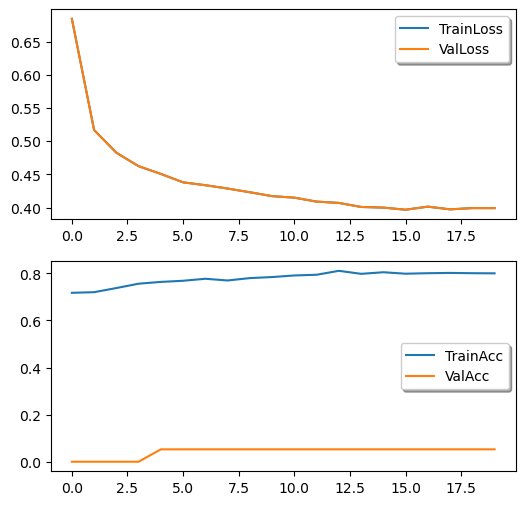

In [12]:
train_losses = []
val_losses = []
train_accs = []
val_accs = []

for epoch in range(20):
    print('epoch : ', epoch,'/20')
    model.partial_fit(train_X, train_y, classes=np.unique(train_y))
    train_acc = model.score(train_X, train_y)
    val_acc = model.score(val_X, val_y)
    train_losses.append(model.model.loss_)
    val_losses.append(model.model.loss_)
    train_accs.append(train_acc)
    val_accs.append(val_acc)

fig, ax = plt.subplots(2, 1, figsize=(6, 6))
ax[0].plot(train_losses, label="TrainLoss")
ax[0].plot(val_losses, label="ValLoss")
ax[0].legend(loc='best', shadow=True)

ax[1].plot(train_accs, label="TrainAcc")
ax[1].plot(val_accs, label="ValAcc")
ax[1].legend(loc='best', shadow=True)
plt.show()

### Evaluating Model on Test Data

In [13]:
train_score = model.score(train_X, train_y)

In [14]:
print('\nModel Accuracy Train: ', train_score)


Model Accuracy Train:  0.8001419950301739


In [15]:
val_score = model.score(val_X, val_y)

In [16]:
print('\nModel Accuracy Validation: ', val_score)


Model Accuracy Validation:  0.05263157894736842


### Matrix Confusion

In [17]:
"""
Predict the labels on test_X
if > 0.5 => + sinon -
"""
print(len(test_X))
predict_out = model.predict(test_X)

32


In [18]:
print(predict_out,'\n', '\n', test_y)

[0. 1. 0. 0. 1. 0. 0. 0. 1. 1. 1. 1. 1. 1. 1. 1. 0. 1. 0. 0. 1. 0. 0. 0.
 1. 1. 1. 1. 1. 1. 1. 1.] 
 
 [0. 0. 0. 0. 0. 0. 0. 0. 1. 1. 1. 1. 1. 1. 1. 1. 0. 0. 0. 0. 0. 0. 0. 0.
 1. 1. 1. 1. 1. 1. 1. 1.]


In [19]:
conf_matrix = confusion_matrix(y_true=test_y, y_pred=predict_out)

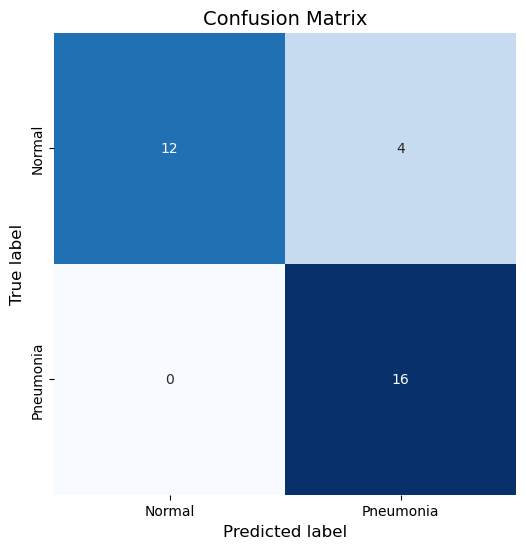

In [20]:
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', cbar=False, square=True, xticklabels=['Normal','Pneumonia'], yticklabels=['Normal','Pneumonia'])
plt.title('Confusion Matrix', fontsize=14)
plt.ylabel('True label', fontsize=12)
plt.xlabel('Predicted label', fontsize=12)
plt.xticks(fontsize=10)
plt.yticks(fontsize=10)
plt.show()